In [43]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

In [44]:
def RK4(a, b, alpha, f, N=10):
    h = (b - a) / N
    w0 = np.array(alpha)
    t = a
    w = [w0]
    t_values = [a]

    for i in range(1, N + 1):
        t = a + i*h
        k1 = h * f(t, w[i - 1])
        k2 = h * f(t + h / 2, w[i - 1] + k1 / 2)
        k3 = h * f(t + h / 2, w[i - 1] + k2 / 2)
        k4 = h * f(t + h, w[i - 1] + k3)
        wi = w[i - 1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        w.append(wi)
        t_values.append(t)
    return np.array(t_values), np.array(w)

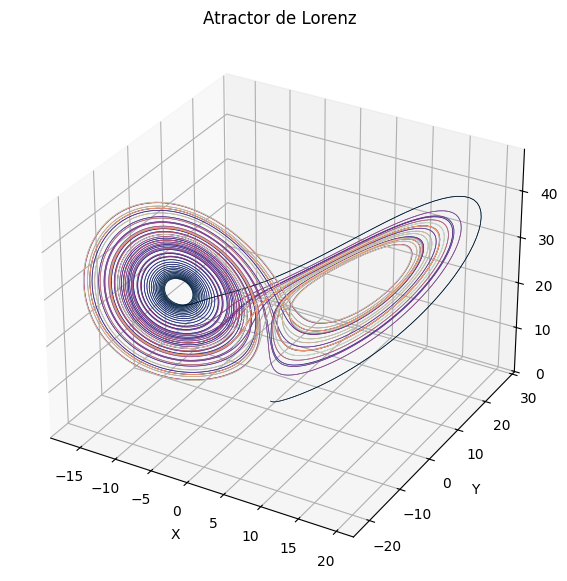

In [54]:
sigma = 10
beta = 2.667
rho = 28


def lorenz(t, y):
    x, y, z = y
    x_dot = sigma * (y - x)
    y_dot = x * (rho - z) - y
    z_dot = x * y - beta * z
    return np.array([x_dot, y_dot, z_dot])


r0 = np.array((0., 1., 1.05))
(a, b) = (0, 50)
N = 10000

t_values, solution = RK4(a, b, r0, lorenz, N)
x_values = solution[:, 0]
y_values = solution[:, 1]
z_values = solution[:, 2]

cmap = cm.magma
norm = plt.Normalize(t_values.min(), t_values.max())
colors = cmap(norm(t_values))  

points = np.array([x_values, y_values, z_values]).T.reshape(-1, 1, 3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

lc = Line3DCollection(segments, cmap=cmap, norm=norm)
lc.set_array(t_values)  
lc.set_linewidth(0.5)
ax.add_collection3d(lc)

ax.plot(x_values, y_values, z_values, lw=0.5, )
ax.set_title("Atractor de Lorenz")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()